# **EDA + DATA CLEANING**
---

**Objetivo**\
Realizar una exploración, análisis y posterior limpieza de la base de datos IMDB: listado de películas 

**Importación de librerías**

In [114]:
# Sistema operativo
import os

# Pandas y Numpy
import numpy as np
import pandas as pd

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Versiones de las librerías instaladas
print("Working with these versions of libraries\n")
print(f"Numpy version {np.__version__}")
print(f"Pandas version {pd.__version__}")

# Config
plt.style.use('ggplot')
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:,.2f}'.format

Working with these versions of libraries

Numpy version 1.21.5
Pandas version 1.4.4


**Ruta del dataset**

In [115]:
CWD = os.getcwd() # Ruta actual
DATA_PATH = os.path.join(CWD, "data") # Ruta de la carpeta Data

print(CWD)
print(DATA_PATH)

d:\Data_Science\EDA_CLEANING_PREPROCCESING\EDA_DATACLEANING
d:\Data_Science\EDA_CLEANING_PREPROCCESING\EDA_DATACLEANING\data


**Clases y funciones**

In [116]:
# Elimina duplicados
def drop_duplicates (df):
    '''
    Elimina filas duplicadas del dataset
    '''
    print(f"{df.shape}")
    df_duplicated = df[df.duplicated(keep = False)]
    print(f"Se han eliminado {len(df[df.duplicated()])} registros repetidos")
    df.drop_duplicates(inplace = True)
    print(f"{df.shape}")

    return df_duplicated

In [117]:
# Nulos en variables
def nulos_variable (dataframe):
    ''' 
    Muestra los nulos que hay
    '''
    nulos_numericas = dataframe.select_dtypes(include = np.number).isnull().sum()[dataframe.select_dtypes(include = np.number).isnull().sum() > 0]
    nulos_categoricas =dataframe.select_dtypes(exclude = np.number).isnull().sum()[dataframe.select_dtypes(exclude = np.number).isnull().sum() > 0]

    print ('Las variables numéricas que tienen nulos son:\n', nulos_numericas, '\n\nHay un total de', len(nulos_numericas), 'variables numéricas con nulos')
    print ('\n\nLas variables categóricas que tienen nulos son:\n', nulos_categoricas, '\n\nHay un total de', len(nulos_categoricas), 'variables categóricas con nulos')
    print ('\n\nVARIABLES TOTALES CON NULOS:', len(nulos_numericas)+len(nulos_categoricas))

**DataFrameReporter**
Nos va a permitir hacer un primer contacto con el dataset.\
Se trata de una clase auxiliar que hará una parte del **EDA**.

In [118]:
class DataFrameReporter(object):
    '''
    Helper class that reports nulls and datatypes of columns
    '''
    def __init__(self, df): # Variables que le tengo que suministrar a la clase
        '''
        Constructor for the class.
        Needs dataframe
        '''
        self.df = df
               
    def analyze_X(self, X):
        '''
        Analyses the DataFrame you pass and returns a report of nulls, distribution and other goodies.
        '''        
               
        dtypes = X.dtypes.to_frame().rename(columns = {0:"Dtypes"}) # Tipos de variables

        nulls_in_X = X.isnull().sum().to_frame().rename(columns = {0:"Absolute_nulls"}) # Número de nulos en las variables
        nulls_in_X["Relative_nulls"] = nulls_in_X["Absolute_nulls"]/X.shape[0]
        nulls_in_X["Relative_nulls"] = nulls_in_X["Relative_nulls"].apply(
            lambda number: round(number, 3) * 100 # Relative_nulls = (Absolute_nulls/Shape)*100 ... con 3 cifras significativas
        )
        
        nulls_in_X = pd.concat([nulls_in_X, dtypes], axis = 1)
        nulls_in_X["Shape"] = X.shape[0] # Número de registros
        nulls_in_X = nulls_in_X[["Dtypes", "Shape", "Absolute_nulls", "Relative_nulls"]] # Ordeno las columnas

         
        describe_values_num = X.describe().T # Describe de las variables numéricas
        report_df = pd.concat([nulls_in_X, describe_values_num], axis = 1)
               
        describe_values_cat = X.describe(exclude = "number").T # Describe de las variables categóricas
        report_df = pd.concat([report_df, describe_values_cat], axis = 1)

        report_df.fillna("", inplace = True) # Imputo los nulos con un vacío
        report_df.sort_values("Dtypes", ascending = True, inplace = True) # Ordeno las variables por tipos
        
        return report_df
        
    def get_reports(self):
        '''
        Calls analyze_X method and returns report DataFrame for train and test.
        '''
        report_df = self.analyze_X(X = self.df)
                
        return report_df

## **1.- Data Loading**

In [119]:
imdb = pd.read_csv (os.path.join(DATA_PATH, "IMDB.csv"),sep=";")

**Eliminar filas repetidas**

In [120]:
drop_duplicates(df=imdb)

(97, 13)
Se han eliminado 6 registros repetidos
(91, 13)


,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
8,Color,Joss Whedon,173,"623,279,547.00",Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,"220,000,000.00",8.10,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
9,Color,Joss Whedon,173,"623,279,547.00",Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,"220,000,000.00",8.10,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
19,Color,Tom Hooper,158,"148,775,460.00",Drama|Musical|Romance,Les Misérables,2012,English,USA,"61,000,000.00",7.60,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000
20,Color,Tom Hooper,158,"148,775,460.00",Drama|Musical|Romance,Les Misérables,2012,English,USA,"61,000,000.00",7.60,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000
28,Color,Ridley Scott,150,"65,007,045.00",Action|Adventure|Drama,Exodus: Gods and Kings,2014,English,UK,"140,000,000.00",6.10,"Christian Bale,María Valverde,Ben Mendelsohn",51000
29,Color,Ridley Scott,150,"65,007,045.00",Action|Adventure|Drama,Exodus: Gods and Kings,2014,English,UK,"140,000,000.00",6.10,"Christian Bale,María Valverde,Ben Mendelsohn",51000
50,Color,Sam Mendes,143,"304,360,277.00",Action|Adventure|Thriller,Skyfall,2012,English,UK,"200,000,000.00",7.80,"Albert Finney,Helen McCrory,Rory Kinnear",80000
51,Color,Sam Mendes,143,"304,360,277.00",Action|Adventure|Thriller,Skyfall,2012,English,UK,"200,000,000.00",7.80,"Albert Finney,Helen McCrory,Rory Kinnear",80000
52,Color,Baz Luhrmann,143,"144,812,796.00",Drama|Romance,The Great Gatsby,2013,English,Australia,"105,000,000.00",7.30,"Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley",115000
53,Color,Baz Luhrmann,143,"144,812,796.00",Drama|Romance,The Great Gatsby,2013,English,Australia,"105,000,000.00",7.30,"Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley",115000


In [121]:
imdb.reset_index(inplace = True)
del imdb['index']

## **2.- EDA** --> *DATA UNDERTANDING*

### 2.1.- ANÁLISIS UNIVARIANTE DE LOS DATOS

**A.- Data Size**

In [122]:
# Tamaño del dataset (filas x columnas)
imdb.size

1183

In [123]:
# Número de filas y columnas
imdb.shape

(91, 13)

In [124]:
# Información resumida del datset
imdb.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Columns: 13 entries, color to movie_facebook_likes
dtypes: float64(3), int64(3), object(7)
memory usage: 9.4+ KB


**B.- Visualización directa de los datos**

In [125]:
# Cinco primeros registros
imdb.head()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,"116,866,727.00",Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,"100,000,000.00",8.20,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,"408,992,272.00",Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,"200,000,000.00",7.20,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,"54,116,191.00",Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,"44,000,000.00",7.90,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,"46,495.00",Drama,Margaret,2011,English,usa,"14,000,000.00",6.50,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,"258,355,354.00",Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,"225,000,000.00",7.90,"Aidan Turner,Adam Brown,James Nesbitt",83000


In [126]:
# Cinco registros aleatorios
imdb.sample(5)

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
45,Color,Adam McKay,143,"2,175,312.00",Comedy,Anchorman 2: The Legend Continues,2013,English,USA,"50,000,000.00",6.30,"Harrison Ford,Will Ferrell,Steve Carell",41000
18,Color,Tom Hooper,158,"148,775,460.00",Drama|Musical|Romance,Les Misérables,2012,English,USA,"61,000,000.00",7.60,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000
49,NaN,NaN,143,NaN,Drama|Horror|Thriller,The Ridges,2011,English,USA,"17,350.00",3.00,"Robbie Barnes,Alana Kaniewski,Brandon Landers",33
33,Color,Christopher Nolan,148,"292,568,851.00",Action|Adventure|Sci-Fi|Thriller,Inception,2010,English,USA,"160,000,000.00",8.80,"Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt",175000
71,Color,Ridley Scott,138,"16,969,390.00",Crime|Drama|Thriller,The Counselor,2013,English,USA,"25,000,000.00",5.30,"Michael Fassbender,Brad Pitt,Goran Visnjic",24000


In [127]:
# Cinco últimos registros
imdb.tail()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
86,Color,Steve McQueen,134,"56,667,870.00",Biography|Drama|History,12 Years a Slave,2013,English,USA,"20,000,000.00",8.10,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000
87,Color,Richard J. Lewis,134,"7,501,404.00",Comedy|Drama,Barney's Version,2010,English,Canada,NaN,7.30,"Mark Addy,Atom Egoyan,Paul Gross",0
88,Color,Paul Greengrass,134,"107,100,855.00",Biography|Drama|Thriller,Captain Phillips,2013,English,USA,"55,000,000.00",7.90,"Tom Hanks,Chris Mulkey,Michael Chernus",65000
89,Color,David Ayer,134,"85,707,116.00",Action|Drama|War,Fury,2014,English,USA,"68,000,000.00",7.60,"Brad Pitt,Logan Lerman,Jim Parrack",82000
90,Color,Clint Eastwood,5,"47,034,272.00",Biography|Drama|Music|Musical,Jersey Boys,2014,English,USA,"40,000,000.00",6.90,"Johnny Cannizzaro,Steve Schirripa,Scott Vance",16000


**C.- Tipos de atributos disponibles**

In [128]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 80 non-null     object 
 1   director_name         80 non-null     object 
 2   duration              91 non-null     int64  
 3   gross                 84 non-null     float64
 4   genres                90 non-null     object 
 5   movie_title           91 non-null     object 
 6   title_year            91 non-null     int64  
 7   language              91 non-null     object 
 8   country               91 non-null     object 
 9   budget                87 non-null     float64
 10  imdb_score            91 non-null     float64
 11  actors                91 non-null     object 
 12  movie_facebook_likes  91 non-null     int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 9.4+ KB


**D.- Estadísticos descriptivos básicos y distribución de los nulos**

In [129]:
# Generamos el report para las variables numéricas ... Llama a la función get_reports() de la clase DataFrameReporter()
report_imdb = DataFrameReporter(df = imdb).get_reports()
report_imdb

,Dtypes,Shape,Absolute_nulls,Relative_nulls,count,mean,std,min,25%,50%,75%,max,count,unique,top,freq
duration,int64,91,0,0.00,91.00,155.79,75.90,-50.00,138.00,143.00,153.50,650.00,,,,
title_year,int64,91,0,0.00,91.00,"1,973.22",266.77,202.00,"2,012.00","2,013.00","2,014.00","2,016.00",,,,
movie_facebook_likes,int64,91,0,0.00,91.00,"63,939.84","58,338.16",0.00,"24,000.00","53,000.00","83,000.00","349,000.00",,,,
gross,float64,91,7,7.70,84.00,"147,788,551.61","134,453,628.17","41,229.00","45,929,625.25","110,133,245.00","235,702,208.25","623,279,547.00",,,,
budget,float64,91,4,4.40,87.00,"102,728,935.06","78,626,885.59","17,350.00","40,000,000.00","70,000,000.00","174,000,000.00","250,000,000.00",,,,
imdb_score,float64,91,0,0.00,91.00,6.85,1.99,-7.50,6.55,7.20,7.85,8.80,,,,
color,object,91,11,12.10,,,,,,,,,80,3,Color,78
director_name,object,91,11,12.10,,,,,,,,,80,61,Michael Bay,3
genres,object,91,1,1.10,,,,,,,,,90,56,Action|Adventure|Sci-Fi,9
movie_title,object,91,0,0.00,,,,,,,,,91,89,Ben-Hur,2


In [130]:
# Lo exporto a excel para poder trabajar con el
#os.mkdir('report')
report_imdb.to_excel('report/imdb_describe.xlsx')

*Análisis variables numéricas*

*duration* --> duración de la película en minutos\
*gross* --> recaudación bruta\
*title_year* --> año de estreno de la película\
*budget* --> presupuesto de la película\
*imdb_score* --> puntuación de imdb\
*movie_facebook_likes* --> likes en facebook

- Hay nulos en las variables 'gross' y 'budget'
- 'duración' --> tiene un mínimo negativo y un máximo de 650 minutos --> errores y posibles outliers
- 'title_year' --> tiene un mínimo de 202 años ( error y posible outlier). Son películas del 2012 al 1016
- 'imdb_score' --> tengo un mínimo negativo --> error y posible outlier

*Análisis variables categóricas*

*color* --> película en blanco y negro o color\
*director_name* --> director de la película\
*genres* --> género de la película\
*movie_title* --> título de la película\
*language* --> idioma de la película\
*country* --> país de la película\
*actors* --> actores de la película

- Hay nulos en 'color', 'director_name', 'genres'
- 'language' tiene un unique=1 (tiene un valor único), por lo que se trata de una variable con baja varianza, irrelevante para el modelo. **Candidadata a ser eliminada**.


In [131]:
# Se elimina la variable "language"
del imdb['language']

**E.- Distribución de los atributos**

In [132]:
num_columns = imdb.select_dtypes(include = np.number).columns.to_list()
cat_columns = imdb.select_dtypes( exclude = np.number ).columns.to_list()

# Para asegurarnos que no nos olvidamos de ninguna columna:
assert (len(num_columns) + len(cat_columns)) == imdb.shape[1], "You have missed some columns"

# Muestro listado de columnas numéricas y categóricas
print("Working with numeric columns:\n", ", ".join(num_columns))
print("Working with categorical columns:\n", ", ".join(cat_columns))

Working with numeric columns:
 duration, gross, title_year, budget, imdb_score, movie_facebook_likes
Working with categorical columns:
 color, director_name, genres, movie_title, country, actors


***Análisis de variables numéricas***

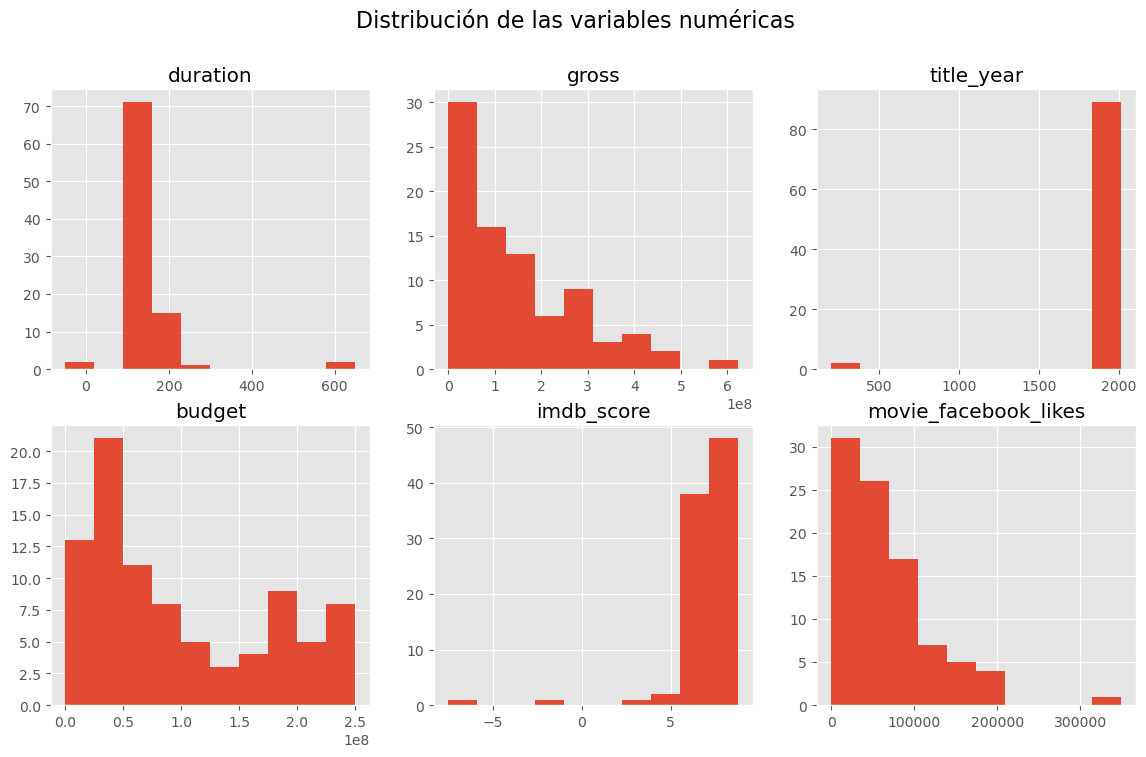

In [133]:
# instanciate the figure
fig = plt.figure(figsize = (14, 8))
for n, num in enumerate (num_columns):
    fig.add_subplot(2, 3, n+1) # Indicamos número de filas y columnas
    imdb[num].hist()
    plt.title(num)

# create a title for the figure
fig.suptitle ('Distribución de las variables numéricas', fontsize = 16);

*"duration"*

In [134]:
imdb[(imdb['duration']<60) | (imdb['duration']>200)]

,color,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,"116,866,727.00",Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,USA,"100,000,000.00",8.20,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
6,Color,Peter Jackson,-50,"303,001,229.00",Adventure|Fantasy,The Hobbit: An Unexpected Journey,2012,USA,"180,000,000.00",7.90,"Aidan Turner,Adam Brown,James Nesbitt",166000
14,Color,Quentin Tarantino,580,"162,804,648.00",Drama|Western,Django Unchained,2012,USA,"100,000,000.00",8.50,"Leonardo DiCaprio,Christoph Waltz,Ato Essandoh",199000
29,Color,Gore Verbinski,650,"89,289,910.00",Action|Adventure|Western,The Lone Ranger,2013,USA,"215,000,000.00",6.50,"Johnny Depp,Ruth Wilson,Tom Wilkinson",48000
90,Color,Clint Eastwood,5,"47,034,272.00",Biography|Drama|Music|Musical,Jersey Boys,2014,USA,"40,000,000.00",6.90,"Johnny Cannizzaro,Steve Schirripa,Scott Vance",16000


In [135]:
# Reemplazo el valor de la duración por 169 minutos (búsqueda en internet)
imdb['duration'] = np.where (imdb['duration']<0, 169, imdb['duration'])

# Reemplazo el valor de la duración por 140 minutos (búsqueda en internet)
imdb['duration'] = np.where (imdb['duration']<60, 140, imdb['duration'])

# Reemplazo el valor de la duración por 200 minutos (búsqueda en internet)
imdb['duration'] = np.where (imdb['duration']==240, 200, imdb['duration'])

# Reemplazo el valor de la duración por 165 minutos (búsqueda en internet)
imdb['duration'] = np.where (imdb['duration']==580, 165, imdb['duration'])

# Reemplazo el valor de la duración por 149 minutos (búsqueda en internet)
imdb['duration'] = np.where (imdb['duration']==650, 149, imdb['duration'])

*"gross"*

In [136]:
# Los vengadores es una película muy taquillera --> la dejamos
imdb[imdb['gross']>5e8]

,color,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
8,Color,Joss Whedon,173,"623,279,547.00",Action|Adventure|Sci-Fi,The Avengers,2012,USA,"220,000,000.00",8.10,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000


*"title_year"*

In [137]:
imdb[imdb['title_year']<2010]

,color,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
5,NaN,NaN,183,"330,249,062.00",Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,202,USA,"250,000,000.00",6.90,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000
73,Color,Daniel Espinosa,137,"1,206,135.00",Crime|Drama|Thriller,Child 44,205,Czech Republic,"50,000,000.00",6.40,"Tom Hardy,Fares Fares,Michael Nardone",18000


In [138]:
# Batman v Superman: Dawn of Justice --> director: Zack Snyder ; title_year: 2016
imdb['title_year'] = np.where(imdb['title_year']==202, 2016, imdb['title_year'])

# Child 44 --> title_year: 2015
imdb['title_year'] = np.where(imdb['title_year']==205, 2015, imdb['title_year'])

*"imdb_score"*

In [139]:
imdb[imdb['imdb_score']<3]

,color,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
9,NaN,Tom Tykwer,172,"27,098,580.00",Drama|Sci-Fi,Cloud Atlas,2012,Germany,"102,000,000.00",-7.50,"Tom Hanks,Jim Sturgess,Jim Broadbent",124000
77,Color,Angelina Jolie Pitt,137,"115,603,980.00",Biography|Drama|Sport|War,Unbroken,2014,USA,"65,000,000.00",-1.20,"Finn Wittrock,Jack O'Connell,Alex Russell",35000


In [140]:
# Reemplazo los valores negativos por los valores obtenidos en internet
imdb['imdb_score'] = np.where (imdb['imdb_score']==-7.50, 7.5, imdb['imdb_score'])
imdb['imdb_score'] = np.where (imdb['imdb_score']==-1.20, 7.2, imdb['imdb_score'])

*"movie_facebook_likes"*

In [141]:
imdb[imdb['movie_facebook_likes']>250000]

,color,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
11,Color,Christopher Nolan,169,"187,991,439.00",Adventure|Drama|Sci-Fi,Interstellar,2014,USA,"165,000,000.00",8.60,"Matthew McConaughey,Anne Hathaway,Mackenzie Foy",349000


In [142]:
# sustituimos su valor por la media
likes_media = int(imdb[imdb['movie_facebook_likes']<250000]['movie_facebook_likes'].mean())
imdb['movie_facebook_likes'] = np.where(imdb['movie_facebook_likes']>250000, likes_media, imdb['movie_facebook_likes'])

*Correlacción entre variables numéricas*

In [143]:
corr=imdb.corr()
corr.style.background_gradient(cmap="coolwarm")

,duration,gross,title_year,budget,imdb_score,movie_facebook_likes
duration,1.000000,0.276608,0.032071,0.270995,0.228407,0.397450
gross,0.276608,1.000000,0.090518,0.768206,0.345271,0.563027
title_year,0.032071,0.090518,1.000000,0.131363,0.094788,0.057591
budget,0.270995,0.768206,0.131363,1.000000,0.130528,0.415382
imdb_score,0.228407,0.345271,0.094788,0.130528,1.000000,0.540383
movie_facebook_likes,0.397450,0.563027,0.057591,0.415382,0.540383,1.000000


No hay correlación entre las variables

*Variables con baja varianza*

Definimos una función que elimine las variables numéricas con baja varianza, considerando como tal aquella que es inferior a 0.15

In [144]:
def varianza_nula (dataframe):
    df_numerical_describe = dataframe.describe(include=np.number).T
    lista_numerica_baja_varianza = df_numerical_describe[(df_numerical_describe['std']<0.15)].index.tolist()
    dataframe.drop(lista_numerica_baja_varianza, axis=1, inplace=True)
    print('Se han borrado las siguientes variables numéricas por tener baja varianza:\n',lista_numerica_baja_varianza )

    return dataframe.head()

In [145]:
varianza_nula (imdb)

Se han borrado las siguientes variables numéricas por tener baja varianza:
 []


,color,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,200,"116,866,727.00",Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,USA,"100,000,000.00",8.20,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,"408,992,272.00",Action|Adventure|Sci-Fi,Iron Man 3,2013,USA,"200,000,000.00",7.20,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,"54,116,191.00",Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,USA,"44,000,000.00",7.90,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,"46,495.00",Drama,Margaret,2011,usa,"14,000,000.00",6.50,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,"258,355,354.00",Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,USA,"225,000,000.00",7.90,"Aidan Turner,Adam Brown,James Nesbitt",83000


***Análisis de variables categóricas***

In [146]:
cat_columns

['color', 'director_name', 'genres', 'movie_title', 'country', 'actors']

In [147]:
for var in cat_columns:
    print(imdb[var].value_counts())

Color               78
color                1
 Black and White     1
Name: color, dtype: int64
Michael Bay             3
Peter Jackson           3
Christopher Nolan       3
Ridley Scott            3
Martin Scorsese         2
Timur Bekmambetov       2
Steven Spielberg        2
Tate Taylor             2
Sam Mendes              2
Paul Thomas Anderson    2
Bryan Singer            2
Angelina Jolie Pitt     2
Marc Webb               2
Joss Whedon             2
Quentin Tarantino       2
Rob Marshall            1
James Wan               1
Derek Cianfrance        1
Gavin O'Connor          1
Gary Ross               1
Terrence Malick         1
David Ayer              1
Robert Zemeckis         1
Paul Greengrass         1
Darren Aronofsky        1
Adam Shankman           1
Richard J. Lewis        1
James Mangold           1
Steve McQueen           1
Daniel Espinosa         1
Walter Salles           1
Tony Gilroy             1
David Dobkin            1
Seth MacFarlane         1
Anthony Russo        

## **3.- DATA PREPARATION**

### 3.1.- IMPUTACIÓN DE NULOS

In [148]:
nulos_variable(imdb)

Las variables numéricas que tienen nulos son:
 gross     7
budget    4
dtype: int64 

Hay un total de 2 variables numéricas con nulos


Las variables categóricas que tienen nulos son:
 color            11
director_name    11
genres            1
dtype: int64 

Hay un total de 3 variables categóricas con nulos


VARIABLES TOTALES CON NULOS: 5


**A.- Variables categóricas**

*"color"* --> 11 nulos

In [149]:
imdb[imdb['color'].isnull()]

,color,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
5,NaN,NaN,183,"330,249,062.00",Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,2016,USA,"250,000,000.00",6.90,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000
9,NaN,Tom Tykwer,172,"27,098,580.00",Drama|Sci-Fi,Cloud Atlas,2012,Germany,"102,000,000.00",7.50,"Tom Hanks,Jim Sturgess,Jim Broadbent",124000
13,NaN,Richard Linklater,165,"25,359,200.00",Drama,Boyhood,2014,USA,"4,000,000.00",8.00,"Ellar Coltrane,Lorelei Linklater,Libby Villari",92000
16,NaN,Christopher Nolan,164,"448,130,642.00",Action|Thriller,The Dark Knight Rises,2012,USA,"250,000,000.00",8.50,"Tom Hardy,Christian Bale,Joseph Gordon-Levitt",164000
49,NaN,NaN,143,NaN,Drama|Horror|Thriller,The Ridges,2011,USA,"17,350.00",3.00,"Robbie Barnes,Alana Kaniewski,Brandon Landers",33
57,NaN,Oliver Stone,141,"47,307,550.00",Crime|Drama|Thriller,Savages,2012,USA,"45,000,000.00",6.50,"Demián Bichir,Shea Whigham,Gary Stretch",28000
66,NaN,Terrence Malick,139,"13,303,319.00",Drama|Fantasy,The Tree of Life,2011,USA,"32,000,000.00",6.70,"Brad Pitt,Tye Sheridan,Fiona Shaw",39000
68,NaN,Robert Zemeckis,138,"93,749,203.00",Drama|Thriller,Flight,2012,USA,"31,000,000.00",7.30,"Denzel Washington,Bruce Greenwood,Nadine Velaz...",64000
72,NaN,James Mangold,138,"132,550,960.00",Action|Adventure|Sci-Fi|Thriller,The Wolverine,2013,USA,"120,000,000.00",6.70,"Hugh Jackman,Tao Okamoto,Rila Fukushima",68000
75,NaN,Walter Salles,137,"717,753.00",Adventure|Drama,On the Road,2012,France,"25,000,000.00",6.10,"Kristen Stewart,Viggo Mortensen,Kirsten Dunst",27000


In [150]:
# Análisis vertical de la variable --> la mayoría de películas en color, por lo que esta variable no va a aportar información útil al modelo
imdb['color'].value_counts()

Color               78
color                1
 Black and White     1
Name: color, dtype: int64

El modelo no va a aprender, ya que siempre tomará el valor "color".\
Eliminamos esta variable.

In [151]:
del imdb['color']

*"director_name"* --> 11 nulos

In [152]:
# Análisis vertical de la variable --> Información relevante para el modelo. No podemos eliminar esta variable
imdb['director_name'].value_counts()

Michael Bay             3
Peter Jackson           3
Christopher Nolan       3
Ridley Scott            3
Martin Scorsese         2
Timur Bekmambetov       2
Steven Spielberg        2
Tate Taylor             2
Sam Mendes              2
Paul Thomas Anderson    2
Bryan Singer            2
Angelina Jolie Pitt     2
Marc Webb               2
Joss Whedon             2
Quentin Tarantino       2
Rob Marshall            1
James Wan               1
Derek Cianfrance        1
Gavin O'Connor          1
Gary Ross               1
Terrence Malick         1
David Ayer              1
Robert Zemeckis         1
Paul Greengrass         1
Darren Aronofsky        1
Adam Shankman           1
Richard J. Lewis        1
James Mangold           1
Steve McQueen           1
Daniel Espinosa         1
Walter Salles           1
Tony Gilroy             1
David Dobkin            1
Seth MacFarlane         1
Anthony Russo           1
Sadyk Sher-Niyaz        1
Ryan Murphy             1
Guillaume Canet         1
Oliver Stone

In [153]:
# Análisis horizontal de la variable --> Los registros tienen nulos sólo en "director_name". No los eliminamos
imdb[imdb['director_name'].isnull()]

,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
5,NaN,183,"330,249,062.00",Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,2016,USA,"250,000,000.00",6.90,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000
21,NaN,156,"183,635,922.00",Adventure|Drama|Thriller|Western,The Revenant,2015,USA,"135,000,000.00",8.10,"Leonardo DiCaprio,Tom Hardy,Lukas Haas",190000
27,NaN,150,"182,204,440.00",Biography|Drama|History|War,Lincoln,2012,USA,"65,000,000.00",7.40,"Joseph Gordon-Levitt,Hal Holbrook,Bruce McGill",71000
36,NaN,147,"407,197,282.00",Action|Adventure|Sci-Fi,Captain America: Civil War,2016,USA,"250,000,000.00",8.20,"Robert Downey Jr.,Scarlett Johansson,Chris Evans",72000
49,NaN,143,NaN,Drama|Horror|Thriller,The Ridges,2011,USA,"17,350.00",3.00,"Robbie Barnes,Alana Kaniewski,Brandon Landers",33
52,NaN,142,"407,999,255.00",Adventure|Drama|Sci-Fi|Thriller,The Hunger Games,2012,USA,"78,000,000.00",7.30,"Jennifer Lawrence,Josh Hutcherson,Anthony Reyn...",140000
63,NaN,139,"150,832,203.00",Adventure|Mystery|Sci-Fi,Divergent,2014,USA,"85,000,000.00",6.70,"Kate Winslet,Theo James,Mekhi Phifer",49000
67,NaN,138,"150,117,807.00",Crime|Drama,American Hustle,2013,USA,"40,000,000.00",7.30,"Jennifer Lawrence,Christian Bale,Bradley Cooper",63000
74,NaN,137,"37,304,950.00",Biography|Crime|Drama,J. Edgar,2011,USA,"35,000,000.00",6.60,"Leonardo DiCaprio,Naomi Watts,Kaitlyn Dever",16000
76,NaN,137,"281,666,058.00",Adventure|Sci-Fi,The Hunger Games: Mockingjay - Part 2,2015,USA,"160,000,000.00",6.60,"Jennifer Lawrence,Philip Seymour Hoffman,Josh ...",38000


In [154]:
# Imputamos con un valor extremo --> "sin_director"
imdb['director_name'].fillna('sin_director', inplace = True)

*"genres"* --> 1 nulo

In [155]:
# Análisis vertical --> Información relevante para el modelo. No podemos eliminar esta variable
imdb['genres'].value_counts()

Action|Adventure|Sci-Fi                     9
Drama                                       5
Crime|Drama|Thriller                        5
Biography|Drama|History                     4
Adventure|Fantasy                           3
Drama|Romance                               3
Action|Adventure|Thriller                   3
Action|Adventure|Fantasy                    2
Crime|Drama|Mystery|Thriller                2
Action|Adventure|Fantasy|Sci-Fi             2
Action|Adventure|Sci-Fi|Thriller            2
Action|Adventure|Drama                      2
Adventure|Drama|History                     2
Crime|Drama                                 2
Drama|History|Thriller                      2
Biography|Drama|Sport|War                   2
Adventure|Drama                             1
Action|Biography|Drama|History              1
Action|Drama|War                            1
Action|Crime|Thriller                       1
Biography|Drama|Thriller                    1
Drama|Sport                       

In [156]:
# Análisis horizontal de la variable --> Los registros tienen nulos sólo en "genres". No los eliminamos
imdb[imdb['genres'].isnull()]

,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
10,Christopher Spencer,170,"59,696,176.00",NaN,Son of God,2014,USA,"22,000,000.00",5.60,"Roma Downey,Amber Rose Revah,Darwin Shaw",15000


In [157]:
# Imputamos con un valor extremo --> "sin_genre"
imdb['genres'].fillna('sin_genre', inplace = True)

**B.- Variables numéricas**

*"gross"*

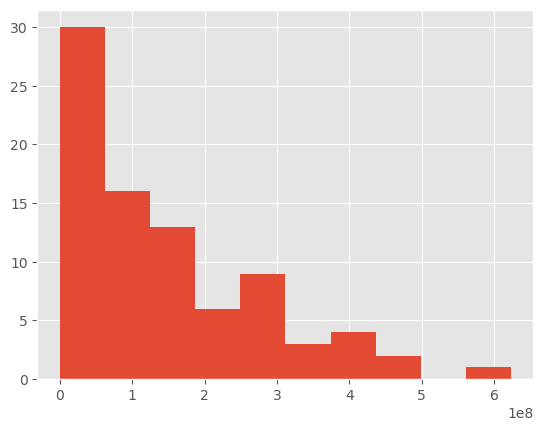

In [158]:
# Análisis vertical --> Información relevante para el modelo. No podemos eliminar esta variable
imdb['gross'].hist();

In [159]:
# Análisis horizontal de la variable --> Los registros tienen nulos sólo en "gross". No los eliminamos
imdb[imdb['gross'].isnull()]

,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
7,Edward Hall,180,NaN,Drama|Romance,Restless,2012,UK,NaN,7.20,"Rufus Sewell,Hayley Atwell,Charlotte Rampling",434
24,Gnana Rajasekaran,153,NaN,Biography|Drama|History,Ramanujan,2014,India,NaN,7.00,"Mani Bharathi,Michael Lieber,Kevin McGowan",58
32,Jay Oliva,148,NaN,Action|Animation|Crime|Sci-Fi|Thriller,"Batman: The Dark Knight Returns, Part 2",2013,USA,"3,500,000.00",8.40,"Michael Emerson,Mark Valley,Grey Griffin",5000
49,sin_director,143,NaN,Drama|Horror|Thriller,The Ridges,2011,USA,"17,350.00",3.00,"Robbie Barnes,Alana Kaniewski,Brandon Landers",33
54,Timur Bekmambetov,141,NaN,Adventure|Drama|History,Ben-Hur,2016,USA,"100,000,000.00",6.10,"Morgan Freeman,Ayelet Zurer,Moises Arias",0
55,Timur Bekmambetov,141,NaN,Adventure|Drama|History,Ben-Hur,2016,USA,"100,000,000.00",6.00,"Morgan Freeman,Ayelet Zurer,Moises Arias",0
84,Sadyk Sher-Niyaz,135,NaN,Action|Biography|Drama|History,Queen of the Mountains,2014,Kyrgyzstan,"1,400,000.00",8.70,"Elina Abai Kyzy,Aziz Muradillayev,Mirlan Abdul...",0


In [160]:
# Reemplazo los nulos por la media
media_gross = int(round(imdb['gross'].mean(),0))
imdb['gross'].fillna(media_gross, inplace = True)

*"budget"* --> 4 nulos

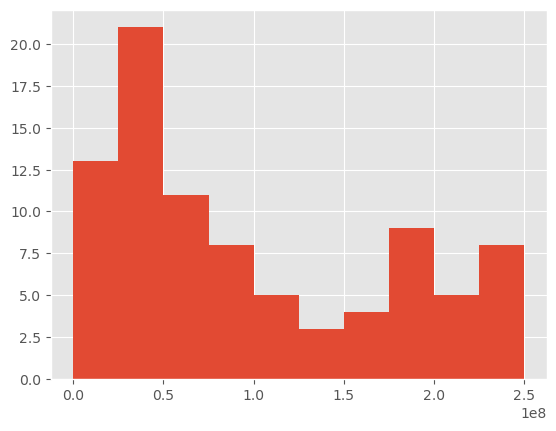

In [161]:
# Análisis vertical --> Información relevante para el modelo. No podemos eliminar esta variable
imdb['budget'].hist();

In [162]:
# Análisis horizontal de la variable --> Los registros tienen nulos sólo en "budget". No los eliminamos
imdb[imdb['budget'].isnull()]

,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
7,Edward Hall,180,"147,788,552.00",Drama|Romance,Restless,2012,UK,NaN,7.20,"Rufus Sewell,Hayley Atwell,Charlotte Rampling",434
24,Gnana Rajasekaran,153,"147,788,552.00",Biography|Drama|History,Ramanujan,2014,India,NaN,7.00,"Mani Bharathi,Michael Lieber,Kevin McGowan",58
28,Mike Leigh,150,"3,958,500.00",Biography|Drama|History,Mr. Turner,2014,UK,NaN,6.80,"Lesley Manville,Ruth Sheen,Karl Johnson",0
87,Richard J. Lewis,134,"7,501,404.00",Comedy|Drama,Barney's Version,2010,Canada,NaN,7.30,"Mark Addy,Atom Egoyan,Paul Gross",0


In [163]:
int(round(imdb['budget'].median(),0))

70000000

In [164]:
# Reemplazo los nulos por la mediana
mediana_gross = int(round(imdb['budget'].median(),0))
imdb['budget'].fillna(mediana_gross, inplace=True)

### 3.2.- TRATAMIENTO DE VARIABLES CATEGÓRICAS

*"genres"*

In [165]:
imdb['genres'].value_counts()

Action|Adventure|Sci-Fi                     9
Drama                                       5
Crime|Drama|Thriller                        5
Biography|Drama|History                     4
Adventure|Fantasy                           3
Drama|Romance                               3
Action|Adventure|Thriller                   3
Crime|Drama|Mystery|Thriller                2
Action|Adventure|Fantasy|Sci-Fi             2
Crime|Drama                                 2
Action|Adventure|Sci-Fi|Thriller            2
Action|Adventure|Drama                      2
Action|Adventure|Fantasy                    2
Adventure|Drama|History                     2
Drama|History|Thriller                      2
Biography|Drama|Sport|War                   2
Adventure|Drama                             1
Comedy|Drama|Musical|Romance                1
Action|Drama|War                            1
Biography|Drama|Thriller                    1
Comedy|Drama                                1
Action|Crime|Thriller             

In [166]:
#separo todos los palitos por comas
imdb['genres'].str.split('|')

0                  [Biography, Comedy, Crime, Drama]
1                        [Action, Adventure, Sci-Fi]
2         [Crime, Drama, Mystery, Thriller, Western]
3                                            [Drama]
4                               [Adventure, Fantasy]
5                        [Action, Adventure, Sci-Fi]
6                               [Adventure, Fantasy]
7                                   [Drama, Romance]
8                        [Action, Adventure, Sci-Fi]
9                                    [Drama, Sci-Fi]
10                                       [sin_genre]
11                        [Adventure, Drama, Sci-Fi]
12         [Biography, Crime, Drama, History, Music]
13                                           [Drama]
14                                  [Drama, Western]
15                       [Action, Adventure, Sci-Fi]
16                                [Action, Thriller]
17                              [Adventure, Fantasy]
18                         [Drama, Musical, Ro

In [167]:
# Convierte cada género en una columna, manteniendo el index
df_generos = imdb['genres'].str.split('|', expand=True)

In [168]:
# Renombro las columnas
df_generos.columns = ["Genero_0", "Genero_1", "Genero_2", "Genero_3", "Genero_4"]

In [169]:
# Imputo los nulos
df_generos.fillna('sin_genero',inplace=True)

In [170]:
# Concatenamos ambos dataframes
imdb = pd.concat([imdb, df_generos], axis = 1)

In [171]:
# Elimino la variable "genres"
del imdb['genres']

*"actors"*

In [172]:
imdb['actors'].value_counts()

Aidan Turner,Adam Brown,James Nesbitt                       3
Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson        2
Morgan Freeman,Ayelet Zurer,Moises Arias                    2
Finn Wittrock,Jack O'Connell,Alex Russell                   2
Leonardo DiCaprio,Matthew McConaughey,Jon Favreau           1
James Franco,Julia Roberts,Billy Crudup                     1
Brad Pitt,Tye Sheridan,Fiona Shaw                           1
Tika Sumpter,Josh Hopkins,Aunjanue Ellis                    1
Matthew McConaughey,Donald Watkins,Jessica Collins          1
Kate Winslet,Theo James,Mekhi Phifer                        1
Tom Hardy,Frank Grillo,Kevin Dunn                           1
Ryan Gosling,Ben Mendelsohn,Angelo Anthony Pizza            1
Jason Statham,Paul Walker,Vin Diesel                        1
Demián Bichir,Shea Whigham,Gary Stretch                     1
Robert Downey Jr.,Robert Duvall,Leighton Meester            1
Denzel Washington,Bruce Greenwood,Nadine Velazquez          1
Terry Ph

In [173]:
# Separo todos los actores y genero una columna para cada actor
df_actors = imdb['actors'].str.split(',', expand=True)
# Renombro las columnas
df_actors.columns = ["Actor_0", "Actor_1", "Actor_2"]
# Imputo los nulos
df_actors.fillna('sin_actor',inplace=True)
# Concatenamos ambos dataframes
imdb = pd.concat([imdb, df_actors], axis = 1)
# Elimino la variable
del imdb['actors']

In [174]:
imdb.head().T

,0,1,2,3,4
director_name,Martin Scorsese,Shane Black,Quentin Tarantino,Kenneth Lonergan,Peter Jackson
duration,200,195,187,186,186
gross,"116,866,727.00","408,992,272.00","54,116,191.00","46,495.00","258,355,354.00"
movie_title,The Wolf of Wall Street,Iron Man 3,The Hateful Eight,Margaret,The Hobbit: The Desolation of Smaug
title_year,2013,2013,2015,2011,2013
country,USA,USA,USA,usa,USA
budget,"100,000,000.00","200,000,000.00","44,000,000.00","14,000,000.00","225,000,000.00"
imdb_score,8.20,7.20,7.90,6.50,7.90
movie_facebook_likes,138000,95000,114000,0,83000
Genero_0,Biography,Action,Crime,Drama,Adventure


In [175]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   director_name         91 non-null     object 
 1   duration              91 non-null     int64  
 2   gross                 91 non-null     float64
 3   movie_title           91 non-null     object 
 4   title_year            91 non-null     int64  
 5   country               91 non-null     object 
 6   budget                91 non-null     float64
 7   imdb_score            91 non-null     float64
 8   movie_facebook_likes  91 non-null     int64  
 9   Genero_0              91 non-null     object 
 10  Genero_1              91 non-null     object 
 11  Genero_2              91 non-null     object 
 12  Genero_3              91 non-null     object 
 13  Genero_4              91 non-null     object 
 14  Actor_0               91 non-null     object 
 15  Actor_1               91 

## 4.5. Dataset final

In [176]:
#os.mkdir('final')
imdb.to_csv('final/imdb_final.csv')
imdb.to_pickle('final/imdb_final.pkl')

In [177]:
pd.read_csv('final/imdb_final.csv', index_col = 0).head().T

,0,1,2,3,4
director_name,Martin Scorsese,Shane Black,Quentin Tarantino,Kenneth Lonergan,Peter Jackson
duration,200,195,187,186,186
gross,"116,866,727.00","408,992,272.00","54,116,191.00","46,495.00","258,355,354.00"
movie_title,The Wolf of Wall Street,Iron Man 3,The Hateful Eight,Margaret,The Hobbit: The Desolation of Smaug
title_year,2013,2013,2015,2011,2013
country,USA,USA,USA,usa,USA
budget,"100,000,000.00","200,000,000.00","44,000,000.00","14,000,000.00","225,000,000.00"
imdb_score,8.20,7.20,7.90,6.50,7.90
movie_facebook_likes,138000,95000,114000,0,83000
Genero_0,Biography,Action,Crime,Drama,Adventure


In [178]:
pd.read_pickle('final/imdb_final.pkl').head().T

,0,1,2,3,4
director_name,Martin Scorsese,Shane Black,Quentin Tarantino,Kenneth Lonergan,Peter Jackson
duration,200,195,187,186,186
gross,"116,866,727.00","408,992,272.00","54,116,191.00","46,495.00","258,355,354.00"
movie_title,The Wolf of Wall Street,Iron Man 3,The Hateful Eight,Margaret,The Hobbit: The Desolation of Smaug
title_year,2013,2013,2015,2011,2013
country,USA,USA,USA,usa,USA
budget,"100,000,000.00","200,000,000.00","44,000,000.00","14,000,000.00","225,000,000.00"
imdb_score,8.20,7.20,7.90,6.50,7.90
movie_facebook_likes,138000,95000,114000,0,83000
Genero_0,Biography,Action,Crime,Drama,Adventure
